In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns


In [153]:
all_data = pd.read_csv('final_train_data.csv').drop(['Unnamed: 0'], axis = 1)

In [154]:
all_data.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,...,final_status,log_goal,launched_month,launched_year,launched_quarter,duration,duration_weeks,buzzword_count,clean_desc,sentiment
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 02:59:59,2009-05-03 03:00:17,...,1,2.995732,4,2009,2,203,1,0,I like drawing pictures. and then i color them...,2
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 19:10:00,2009-05-15 20:00:18,...,0,5.703782,4,2009,2,403,2,0,"I, Dereck Blackburn will be taking upon an inc...",3
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-22 17:26:00,2009-05-22 17:30:18,...,0,3.401197,5,2009,2,239,1,0,So I saw darkpony's successfully funded drawin...,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-28 20:09:00,2009-05-28 20:15:21,...,1,6.214608,4,2009,2,719,4,2,Do your part to help out starving artists and ...,2
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 07:38:00,2009-05-31 07:45:17,...,0,7.600902,5,2009,2,719,4,1,"I'm nearing completion on a sculpture, current...",1


In [110]:
def box_plot(data, x, y, y_lim, xlabel, ylabel, title):
    xtick = np.array([-1,0,1,2])
    plt.boxplot(data, positions = [0,1], whis = 0.5, sym = '', meanline = True)
#     y_remain = []
#     x_remain = []
#     for i, j in enumerate(y):
#         if j > y_lim[0] and j < y_lim[1]:
#             y_remain.append(j)
#             x_remain.append(x[i])
#    plt.scatter(x, y, c = 'orange', marker = '.', alpha = 0.3)
    plt.plot(xtick, slope*xtick+intercept, c = 'red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()

In [111]:
x = all_data['final_status'].values
# y = all_data['backers_count'].apply(lambda x: np.log(x) if x >1 else 0).values
y = all_data['duration'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
data = [[],[]]
for i, j in enumerate(x):
    data[j%2].append(y[i])
print(p_value)
print(r_value**2)

1.4909892710805388e-209
0.008787554580326509


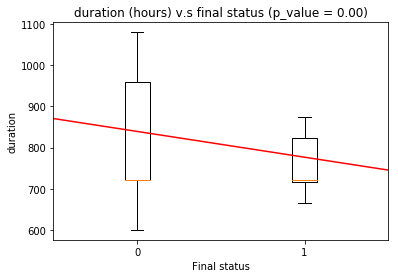

In [112]:
box_plot(data, x, y, None, 'Final status', 'duration', 'duration (hours) v.s final status (p_value = %.2f)' % p_value)

In [126]:
# Chi-square test for disable communication
#                0  1
obs = np.array([[0, 0],  #True
                [0, 0]]) #False
consider = all_data[['disable_communication', 'final_status']]
true_0 = all_data.groupby(['disable_communication'])['final_status'].apply(list).reset_index(name = 'final_status')

In [127]:
true_0

,disable_communication,final_status
0,False,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, ..."
1,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [135]:
total_true = np.sum(true_0.loc[true_0['disable_communication'] == True, 'final_status'].iloc[0])
obs[0][0] = len(true_0.loc[true_0['disable_communication'] == True, 'final_status'].iloc[0])

In [136]:
total_true

0

In [138]:
total_1 = np.sum(true_0.loc[true_0['disable_communication'] == False, 'final_status'].iloc[0])

In [139]:
total_false = len(true_0.loc[true_0['disable_communication'] == False, 'final_status'].iloc[0])

In [140]:
obs[1][1] = total_1
obs[1][0] = total_false - total_1

In [141]:
obs

array([[  323,     0],
       [73245, 34561]])

In [142]:
g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

In [143]:
p

1.204274932754295e-34

(12, 12)


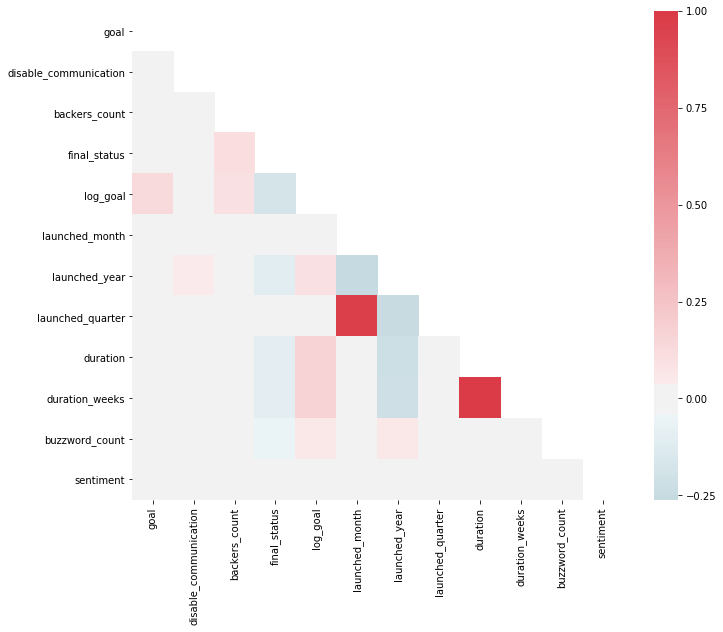

In [172]:
corr_matrix = all_data.corr()
print(corr_matrix.shape)

norm = MidPointNorm(midpoint=0)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
sns.heatmap(corr_matrix, cmap=cmap, mask = mask, center=0)
plt.show()

In [174]:
onehot = ['country', 'currency']
one_hot = pd.get_dummies(all_data, prefix=onehot, columns=onehot)

In [175]:
one_hot.head()

,project_id,name,desc,goal,keywords,disable_communication,deadline,state_changed_at,created_at,launched_at,...,country_US,currency_AUD,currency_CAD,currency_DKK,currency_EUR,currency_GBP,currency_NOK,currency_NZD,currency_SEK,currency_USD
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,2009-05-03 02:59:59,2009-05-03 03:00:17,2009-04-24 15:15:07,2009-04-24 15:52:03,...,1,0,0,0,0,0,0,0,0,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,2009-05-15 19:10:00,2009-05-15 20:00:18,2009-04-28 19:10:24,2009-04-28 23:26:32,...,1,0,0,0,0,0,0,0,0,1
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,2009-05-22 17:26:00,2009-05-22 17:30:18,2009-05-12 17:26:53,2009-05-12 17:39:58,...,1,0,0,0,0,0,0,0,0,1
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,2009-05-28 20:09:00,2009-05-28 20:15:21,2009-04-28 20:09:55,2009-04-28 20:58:50,...,1,0,0,0,0,0,0,0,0,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,2009-05-31 07:38:00,2009-05-31 07:45:17,2009-05-01 07:38:34,2009-05-01 08:22:21,...,1,0,0,0,0,0,0,0,0,1


(32, 32)


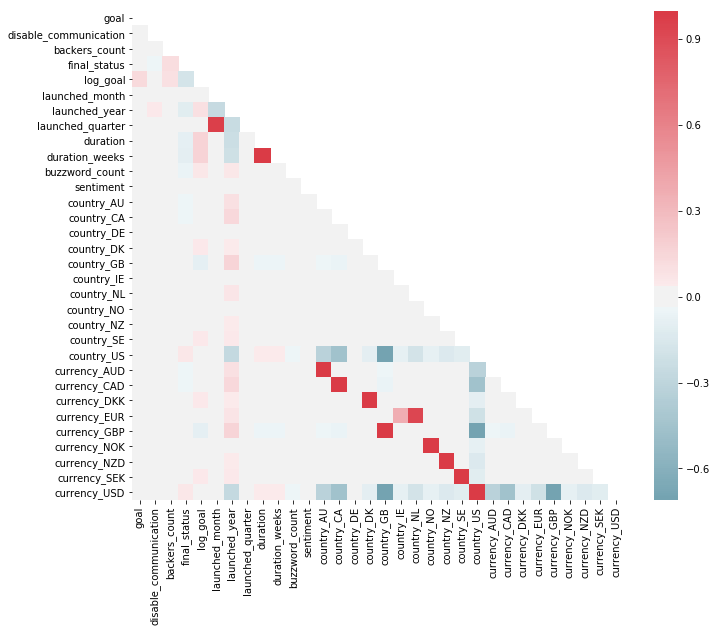

In [176]:
corr_matrix = one_hot.corr()
print(corr_matrix.shape)

norm = MidPointNorm(midpoint=0)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
sns.heatmap(corr_matrix, cmap=cmap, mask = mask, center=0)
plt.show()

In [177]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 23 columns):
project_id               108129 non-null object
name                     108128 non-null object
desc                     108121 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null object
state_changed_at         108129 non-null object
created_at               108129 non-null object
launched_at              108129 non-null object
backers_count            108129 non-null int64
final_status             108129 non-null int64
log_goal                 108129 non-null float64
launched_month           108129 non-null int64
launched_year            108129 non-null int64
launched_quarter         108129 non-null int64
duration                 10812